### Цель работы: 
Научиться применять разработанный пайплайн для тиражирования кода с целью решения широкого круга задач машинного обучения.

### Основные задачи:
- получение навыков рефакторинга кода в проектах машинного обучения;
- получение навыков определения ключевых признаков в задачах машинного обучения;
- получение навыков реализации ключевых стратегий оптимизации моделей регрессии.

## Описание колонок

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).


### 1. Импорт библиотек

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

### 2. Произведем чтение данных

In [41]:
import pandas as pd
df = pd.read_csv("sales.csv")
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведем анализ данных, посмотрим на индивидуальные графики зависимости целевой функции и отдельной переменной. Так как признаков в выборке не так много, удобно построить [sns.pairplot].

2. Закодируем категориальные признаки (с помощью [pd.get_dummies]).

3. Создадим дополнительные переменные из имеющихся, чтобы увеличить точность модели регрессии, добавив новые признаки


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Изучая исходные данные, можно сделать вывод, что мы имеем данные о продажах квартир. Нам доступны сведения о характеристиках каждой квартиры.

Стоит отметить, что категориальных признаков всего 2 - Street и SaleCondition,которые отображают данные о покрытии придомовой территории и условиях сделки. Остальные признаки - количественные. 


Проверим пропуски в данных перед анализом зависимостей переменных

In [43]:
df.isna().sum()

SalePrice        0
GrLivArea        0
GarageArea       0
OverallQual      0
Street           0
SaleCondition    0
dtype: int64

Пропусков в данных не наблюдается

В дальнейших шагах поставим себе цель - предсказать стоимость квартиры, т.е. SalePrice, по существующим признакам. 

1. Построим индивидуальные графики зависимости целевой функции и отдельной переменной:

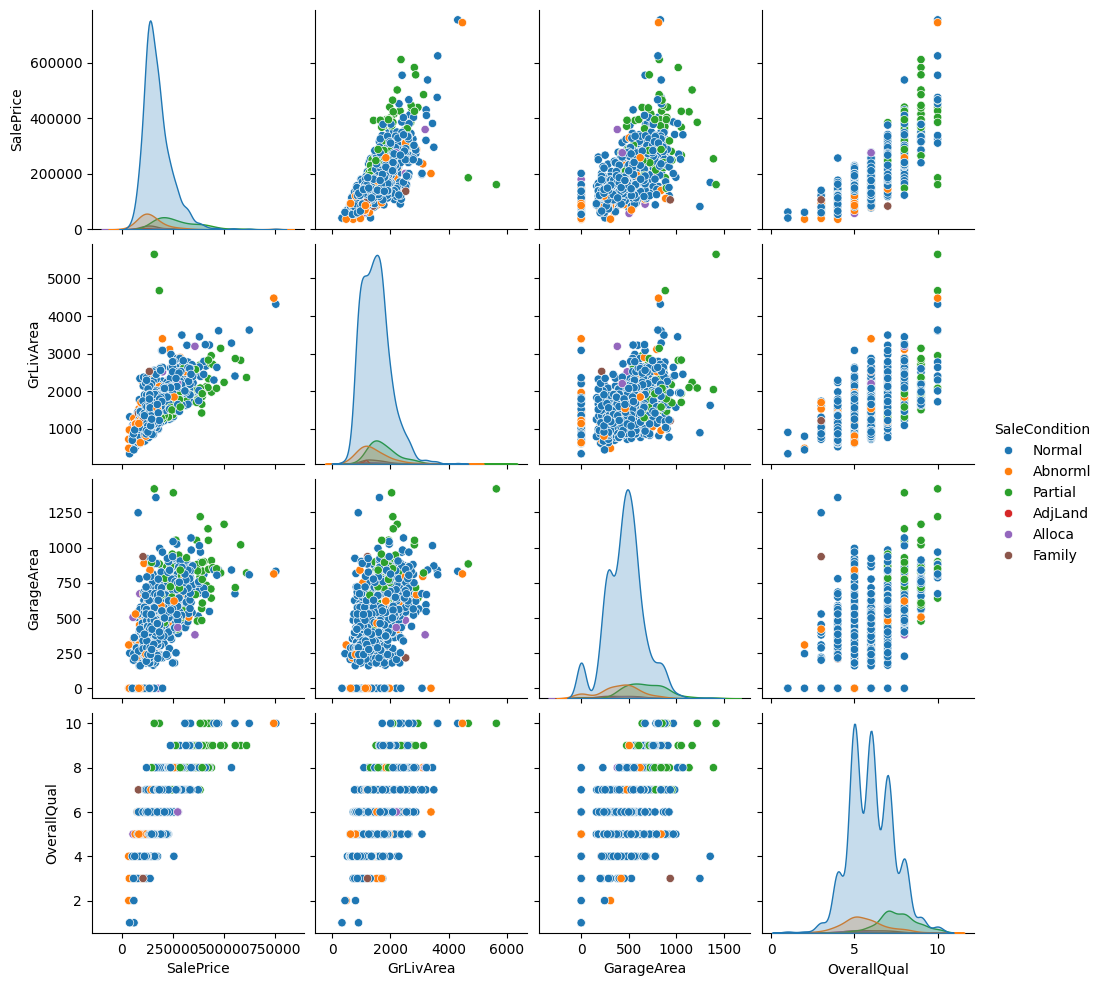

In [44]:
# Ваш код здесь
sns.pairplot(df[['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual', 'Street', 'SaleCondition']],hue="SaleCondition")
plt.show()

Обратим внимание на графики рассеяния в столбце SalesPrice. По ним можно сделать вывод о том, что данные признаки имеют линейную зависимость друг от друга, а значит можно использовать Линейную регрессию для прогноза данных. При этом возникают выбросы стоимости в виду того, что целевая переменная SalePrice имеет очень большие значения.

Выведем матрицу корреляций для того, чтобы увериться в хорошей корреляции между переменными:

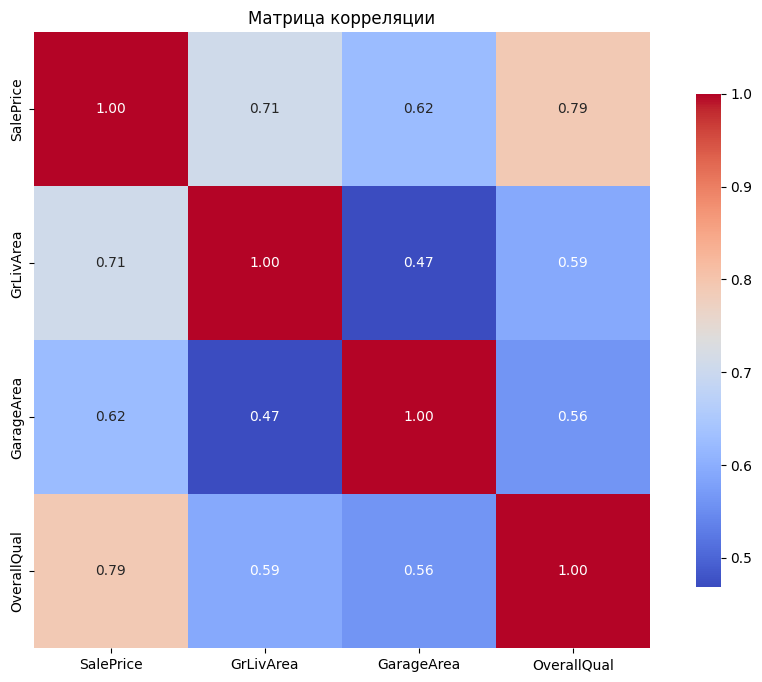

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.drop(columns=['Street','SaleCondition']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляции')
plt.show()

Все зависимости около 0.5 или даже превышают это значение, что дает нам хорошую возможность для построения линейной регрессии

2. Закодируем категориальные признаки (с помощью pd.get_dummies).


In [45]:
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['Street', 'SaleCondition'])

# df_encoded будет содержать закодированные категориальные признаки
df_encoded

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,False,True,False,False,False,False,True,False
1,181500,1262,460,6,False,True,False,False,False,False,True,False
2,223500,1786,608,7,False,True,False,False,False,False,True,False
3,140000,1717,642,7,False,True,True,False,False,False,False,False
4,250000,2198,836,8,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,False,True,False,False,False,False,True,False
1456,210000,2073,500,6,False,True,False,False,False,False,True,False
1457,266500,2340,252,7,False,True,False,False,False,False,True,False
1458,142125,1078,240,5,False,True,False,False,False,False,True,False


### 4. Разделение на обучающую и тестовую выборки

In [47]:
# Ваш код здесь
x = df_encoded.drop(['SalePrice'], axis=1)
y = df_encoded['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [48]:
# Ваш код здесь
model = LinearRegression()
model.fit(x_train, y_train)
print('w_0:', model.intercept_)
print('остальные коэффициенты:', model.coef_)


w_0: -73744.62119451974
остальные коэффициенты: [    44.94510968     68.17379467  26852.18372485   7565.04262828
  -7565.04262828 -11767.11156349  -2918.1169968   23487.412616
 -24155.27290003  -4594.5455906   19947.63443492]


### 6. Получение предсказаний для обучающей и тестовой выборок

In [49]:
# Ваш код здесь
y_pred_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

### 7. Проверка предсказаний

1. Проверим качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Построим диаграмму рассеяния целевой и предсказанной переменных. 

In [50]:
# Ваш код здесь
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1610474555.721738
Test MSE: 1579237977.4400513


In [51]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 26323.054922487365
Test MAE: 26708.173772023092


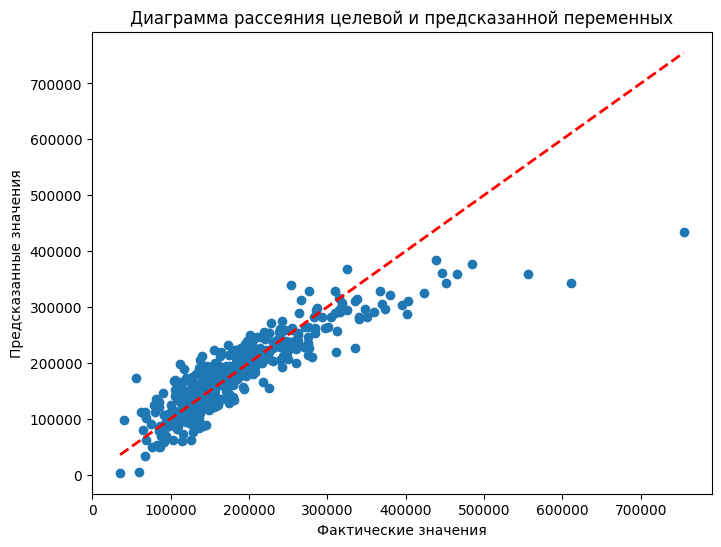

In [52]:
import matplotlib.pyplot as plt

# Предположим, что y_test - это целевая переменная, а y_pred - предсказанные значения
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_test)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Диаграмма рассеяния целевой и предсказанной переменных')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.show()


Таким образом, модель хорошо себя проявила, показав близкие к нулю MAE и MSE. Также модель не переобучена, потому как разница в ошибках при тестовой и тренировочной выборкой маленькая. По диаграмме рассеяния можно сделать вывод, что между целевой и предсказанной переменными существуюет сильная, положительная связь.

## Оптимизация модели с помощью Backward Elimination

За основу сравнения значений мы возьмем p-value = 0,05. Если значение признака будет превышать его, то мы будем удалять столбец с этим значением

In [68]:
import statsmodels.regression.linear_model as sm 

x = df_encoded.drop(['SalePrice'], axis=1)
y = df_encoded['SalePrice']
X = X.astype(int)

x = np.append(arr = np.ones((len(X), 1)).astype(int),  
              values = X, axis = 1) 

# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
x_opt = x[:, [0,1,2,3,4,5,6,7,8,9,10,11]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     481.3
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:20:27   Log-Likelihood:                -17534.
No. Observations:                1460   AIC:                         3.509e+04
Df Residuals:                    1450   BIC:                         3.514e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.602e+04   6005.739     -9.328      0.000   -6.78e+04   -4.42e+04
x1            51.0745      2.538     20.125      0.000      46.096      56.053
x2            66.1623      6.175     10.715      0.000      54.050      78.275
x3          2.619e+04   1053.570     24.855      0.000    2.41e+04    2.83e+04
x4         -3.202e+04   1.08e+04     -2.975      0.003   -5.31e+04   -1.09e+04
x5           -2.4e+04   6253.439     -3.838      0.000   -3.63e+04   -1.17e+04
x6         -1.904e+04   5153.441     -3.695      0.000   -2.92e+04   -8935.114
x7         -7578.0451   1.72e+04     -0.440      0.660   -4.14e+04    2.62e+04
x8         -1.114e+04   1.04e+04     -1.071      0.284   -3.15e+04    9259.762
x9         -2.725e+04   8450.930     -3.225      0.001   -4.38e+04   -1.07e+04
x10        -8719.3264   4077.689     -2.138      0.033   -1.67e+04    -720.527
x11         1.771e+04   5324.756      3.327      0.001    7268.600    2.82e+04
==============================================================================
Omnibus:                      379.364   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21280.793
Skew:                           0.270   Prob(JB):                         0.00
Kurtosis:                      21.696   Cond. No.                     5.29e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
x_opt = x[:, [0,1,2,3,4,5,6,8,10,11]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     541.5
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:16:24   Log-Likelihood:                -17535.
No. Observations:                1460   AIC:                         3.509e+04
Df Residuals:                    1451   BIC:                         3.514e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.191e+04   8188.932     -8.782      0.000    -8.8e+04   -5.59e+04
x1            51.0697      2.538     20.124      0.000      46.092      56.048
x2            65.6904      6.152     10.678      0.000      53.623      77.758
x3           2.62e+04   1053.308     24.878      0.000    2.41e+04    2.83e+04
x4         -3.992e+04   1.14e+04     -3.512      0.000   -6.22e+04   -1.76e+04
x5           -3.2e+04   6422.654     -4.982      0.000   -4.46e+04   -1.94e+04
x6          4940.4432   9063.407      0.545      0.586   -1.28e+04    2.27e+04
x7          1.287e+04   1.42e+04      0.906      0.365    -1.5e+04    4.07e+04
x8          1.529e+04   8237.763      1.856      0.064    -872.238    3.14e+04
x9           4.18e+04   9071.358      4.608      0.000     2.4e+04    5.96e+04
==============================================================================
Omnibus:                      379.215   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21201.289
Skew:                           0.271   Prob(JB):                         0.00
Kurtosis:                      21.661   Cond. No.                     2.13e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
x_opt = x[:, [0,1,2,3,4,5,8,10,11]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     619.1
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:16:36   Log-Likelihood:                -17535.
No. Observations:                1460   AIC:                         3.509e+04
Df Residuals:                    1452   BIC:                         3.513e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.924e+04   6560.360    -10.555      0.000   -8.21e+04   -5.64e+04
x1            51.0794      2.537     20.133      0.000      46.103      56.056
x2            65.7393      6.150     10.690      0.000      53.676      77.803
x3          2.619e+04   1052.901     24.879      0.000    2.41e+04    2.83e+04
x4         -3.859e+04   1.11e+04     -3.477      0.001   -6.04e+04   -1.68e+04
x5         -3.065e+04   5929.879     -5.169      0.000   -4.23e+04    -1.9e+04
x6          8872.2318   1.22e+04      0.730      0.466    -1.5e+04    3.27e+04
x7           1.13e+04   3772.552      2.994      0.003    3895.146    1.87e+04
x8          3.781e+04   5356.635      7.058      0.000    2.73e+04    4.83e+04
==============================================================================
Omnibus:                      379.645   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21263.916
Skew:                           0.273   Prob(JB):                         0.00
Kurtosis:                      21.688   Cond. No.                     4.37e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
x_opt = x[:, [0,1,2,3,4,5,10,11]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     722.4
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:16:58   Log-Likelihood:                -17535.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1453   BIC:                         3.512e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.828e+04   6425.832    -10.626      0.000   -8.09e+04   -5.57e+04
x1            51.1911      2.532     20.217      0.000      46.224      56.158
x2            65.8081      6.148     10.704      0.000      53.748      77.868
x3          2.616e+04   1051.666     24.875      0.000    2.41e+04    2.82e+04
x4         -3.744e+04    1.1e+04     -3.408      0.001    -5.9e+04   -1.59e+04
x5         -3.084e+04   5923.160     -5.207      0.000   -4.25e+04   -1.92e+04
x6          1.053e+04   3622.783      2.906      0.004    3422.636    1.76e+04
x7          3.705e+04   5254.619      7.051      0.000    2.67e+04    4.74e+04
==============================================================================
Omnibus:                      378.886   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21254.024
Skew:                           0.267   Prob(JB):                         0.00
Kurtosis:                      21.684   Cond. No.                     2.41e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Как мы можем заметить по этому графику, наши признаки не превышают p-value для наших коэффициентов уравнения регрессии, потому мы не можем удалить какие-либо признаки. 

Все признаки, оставшиеся в нашей модели оптимизации, имеют наибольшее влияние на цену продаж квартир. Это столбцы с индексами: [1,2,3,4,5,10,11] или же столбцы 'GrLivArea','GarageArea', 'OverallQual', 'Street_Grvl','Street_Pave', 'SaleCondition_Normal', 'SaleCondition_Partial'